# Лабораторная работа №5: Исследование результатов фильтрации дискретного сигнала с помощью нерекурсивных фильтров, построенных на основе полиномиальных приближений

Выполнили студенты гр. 9304 Цаплин Илья и Силкин Владислав. Вариант №11

## Цель работы

Получение практических навыков выполнения фильтрации дискретных последовательностей с помощью полиномиальных фильтров, а также анализа получаемых результатов с помощью дискретного преобразования Фурье (ДПФ). 

## Основные теоретические положения

**Дискретный сигнал:** $x_0, x_1, x_2, ..., x_{N-1}$, как правило, получается при дискретизации аналогового (определенного во все моменты времени) сигнала $s(t)$ 

Будем считать, что $x_k, k = 0,1,2,3, ..., N-1$, отсчёты дискретного
сигнала, получены в результате дискретизации сигнала $s(t)$ с шагом дискретизации, равным единице: $x_k = s(t_k), k = 0,1,2,3, ..., N-1; t_k - t_{k-1} = T, k = 1,2,3, ..., N-1; T = 1$

Если на самом деле $t_k - t_{k-1} = \Delta t, k = 1,2,3, ..., N-1; \Delta t \ne 1 $
то вводим в рассмотрение $\hat{t_k} = \dfrac{(t_k - t_0)}{\Delta t}, k = 0,1,2,3, ..., N-1$

В результате получим: $\hat{t_k} = k; s(\hat{t_k}) = s(k \Delta t), k = 0,1, ..., N-1$

**Дискретное преобразование Фурье:** Поскольку $s(t)$ периодическая функция, ее можно
разложить в ряд Фурье, коэффициенты которого
вычисляются по формуле: $X(n) = \dfrac{1}{NT} \int\limits_0^{NT} s(t)e^{-i\omega_n t}dx$, или после преобразорваний $X(n) = \sum\limits_{k = 0}^{N-1} x_k e ^ { -i \frac{2\pi nk}{N}}, n = 0, 1, 2, ..., N-1$

**Передаточные функции:**

Для линейного преобразования по 5 точкам:
$$H_5 (\omega) = \frac15 (1 + 2\cos\omega + 2\cos{2\omega})$$
по 9 точкам:
$$H_9(\omega) = \frac15 (1 + 2\cos\omega + 2\cos{2\omega} + 2\cos{3\omega} + 2\cos{4\omega})$$
Для преобразования полинома 2-ой степени по 5 точкам:
$$H_5(\omega) = \frac1{35}(17 + 24\cos\omega - 6\cos{2\omega})$$
по 9 точкам:
$$H_9(\omega) = \frac1{231}(59 + 108\cos\omega + 78\cos{2\omega} + 28\cos{3\omega} - 42\cos{4\omega})$$
Для преобразования полинома 4-ой степени по 7 точкам:
$$H_7(\omega) = \frac1{231}(131 + 150\cos\omega - 60\cos{2\omega} + 10\cos{3\omega})$$
по 11 точкам:
$$H_{11}(\omega) = \frac1{429}(143 + 240\cos\omega + 120\cos{2\omega} - 20\cos{2\omega} - 90\cos{4\omega} + 36\cos{5\omega})$$
С помощью передаточных функций можно получить функции сглаживания:

**Функции сглаживания:**

Для линейного сглаживания по 5 точкам:
$$y_{5}(n) = \frac15 \sum\limits_{k=n-2}^{n+2} x_k$$
по 9 точкам:
$$y_{9}(n) = \frac19 \sum\limits_{k=n-4}^{n+4} x_k$$
Для сглаживания при помощи полинома 2-ой степени по 5 точкам:
$$y_5(n) = \frac1{35}(-3x_{k-2} + 12x_{k-1} + 17x_k +12x_{k+1} - 3x_{k+2})$$
по 9 точкам:
$$y_9(n) = \frac1{231}(-21x_{k-4} + 14x_{k-3} + 39x_{k-2} + 54x_{k-1} + 59x_k + 54x_{k+1} + 39x_{k+2} + 14x_{k+3} - 21x_{k+4})$$
Для сглаживания при помощи полинома 4-ой степени по 7 точкам:
$$y_7(n) = \frac1{231}(5x_{k-3} - 30x_{k-2} + 75x_{k-1} + 131x_k + 75x_{k+1} - 30x_{k+2} + 5x_{k+3})$$
по 11 точкам:
$$y_{11}(n) = \frac1{429} (13x_{k-5} - 45x_{k-4} - 10x_{k-3} + 60x_{k-2} + 120x_{k-1} + 143x_k + 120x_{k+1} + 60x_{k+2} - 10x_{k+3} - 45x_{k+4} - 13x_{k+5})$$

## Постановка задачи

Для заданного дискретного сигнала применить фильтры, основанные на сглаживании полиномами. Полученные результаты содержательно проинтерпретировать. 

## Выполнение работы

1. Сформируем дискретный сигнал с шагом $T = 1$ на основе аналогового сигнала, вида линейной комбинации косинусойд $A_k \cos(\omega_k t + \varphi_k)$, с изменяющимся шагом $\Delta \omega = 0.1\pi$, с коэффициентами $A_k$, случайно сгенерированными целыми числами от 1 до 11, начальная фаза $\varphi_k \in [0;0.5]$, сгенерировано 32 отсчёта ($N=31$).

In [1]:
import numpy as np
from matplotlib import pyplot as plt

N = 32
np.random.seed(11)

# Характеристики сигнала
omegas = np.arange(0, np.pi + 0.1 * np.pi, 0.1 * np.pi)
A_coeffs = np.random.randint(1, 11, 11)
phases = np.random.uniform(0, 0.5, 11)
    
# Моделируемый сигнал
def f(x_list):
    y = []
    
    for x in x_list:
        y_value = 0
        for omega, A, phase in zip(omegas, A_coeffs, phases):
            y_value += A * np.cos(omega * x + phase)
        y_value = y_value / np.sum(A_coeffs)
        y.append(y_value)
    return y

x_analog = np.linspace(0, N, 1000)
signal_analog = f(x_analog)
x_discrete = np.linspace(0, N, N)
signal_discrete = f(x_discrete)

2. Визуализируем сгенерированные аналоговый и дискретный сигналы на промежутке $k \in [0;31]$

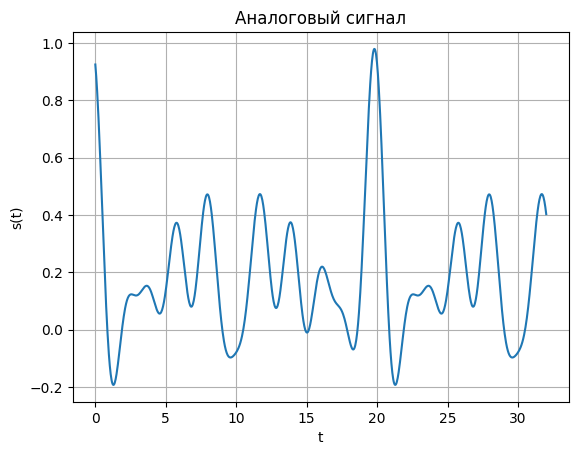

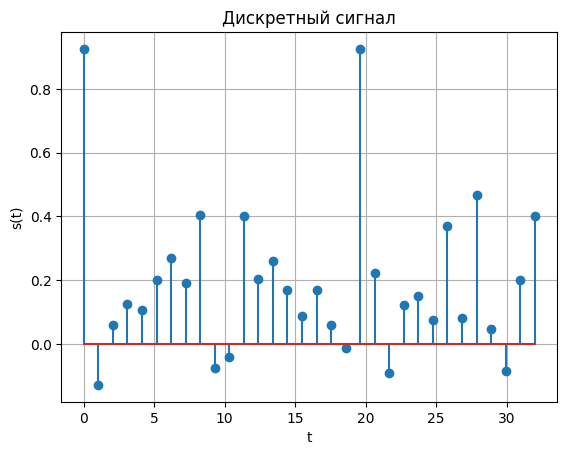

In [2]:
# Функция отрисовки
def show_plot(X, Y, analog=False):
    plt.clf()
    plt.grid()
    if analog:
        plt.plot(X, Y)
    else:
        plt.stem(X, Y)

show_plot(x_analog, signal_analog, analog=True)
plt.xlabel('t')
plt.ylabel('s(t)')
plt.title('Аналоговый сигнал')
plt.show()
show_plot(x_discrete, signal_discrete)
plt.xlabel('t')
plt.ylabel('s(t)')
plt.title('Дискретный сигнал')
plt.show()

3. С помощью ДПФ найдем дискретные отсчёты спектра дискретного сигнала и визуализируем их. Сгенерируем и построим половину отсчётов спектра сигнала, ввиду симметричности отсчётов спектра:

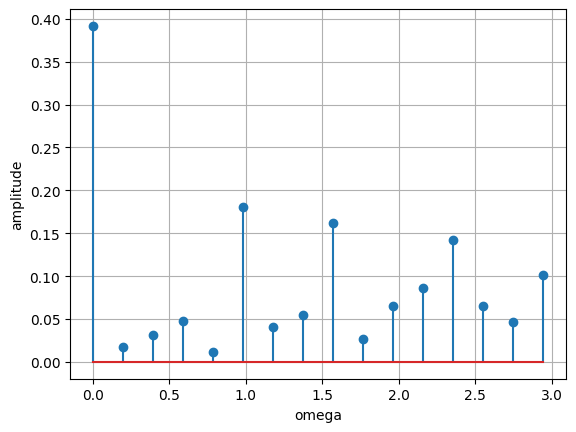

In [3]:
from scipy.fft import fft, fftfreq

def DFT(signal):
    FFT_result = fft(signal)
    frequencies = fftfreq(N, 1)[:N//2]
    omega_frequencies = 2 * np.pi * frequencies
    return omega_frequencies, 2.0 / N * np.abs(FFT_result[0:N//2])

omega_frequencies, amplitudes = DFT(signal_discrete)
plt.stem(omega_frequencies, amplitudes)
plt.xlabel('omega')
plt.ylabel('amplitude')
plt.grid()
plt.show()

4. Создадим функции сглаживания: линейную для любого количества точкем, для полинома 2 степени по 5 и 9 точкам, для полинома 4 степени по 7 и 11 точкам, применим линейное сглаживание к дискретному сигналу по 5 и 9 точкам. Все функции указаны в основных теоретичиских положениях.

In [4]:
# Линейное сглаживание 
def lin_smooth(y, dots):
    return np.convolve(y, np.ones(dots), 'same') / dots

# Сглаживание полиномом
def polys(y, dots):
    if dots == 5:
        return np.convolve(y, np.array([-3, 12, 17, 12, -3]), 'same') / 35
    elif dots == 9:
        return np.convolve(y, np.array([-21, 14, 39, 54, 59, 54, 39, 14,-21]), 'same') / 231
    elif dots == 7:
        return np.convolve(y, np.array([5, -30, 75, 131, 75, -30, 5]), 'same') / 231
    elif dots == 11:
        return np.convolve(y, np.array([18, -45, -10, 60, 120, 143, 120, 60, -10, -45, 18]), 'same') / 429

In [5]:
lin_smooth_5 = lin_smooth(signal_discrete, 5)
lin_smooth_9 = lin_smooth(signal_discrete, 9)

5. Визуализируем полученные линейным сглаживанием по 5 и 9 точкам сигналы

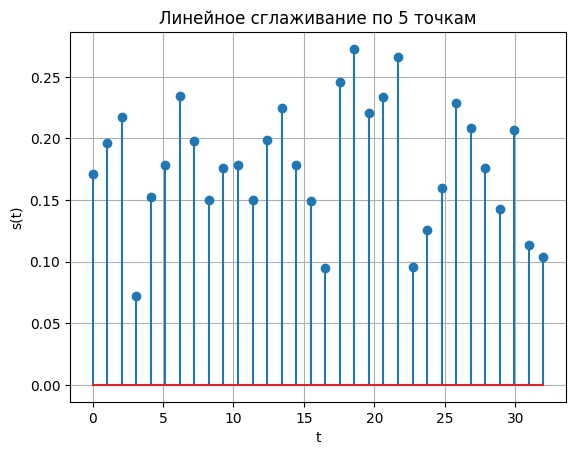

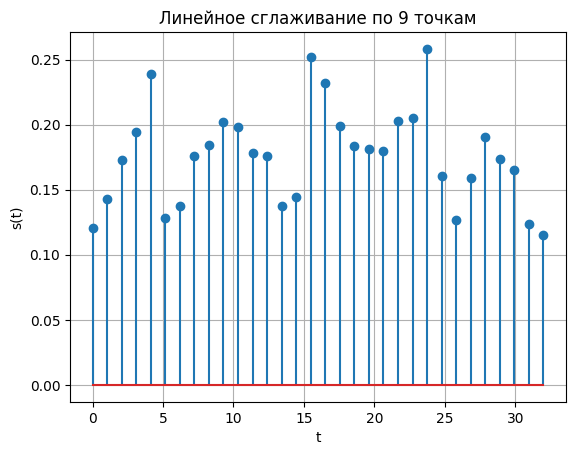

In [6]:
show_plot(x_discrete, lin_smooth_5)
plt.xlabel('t')
plt.ylabel('s(t)')
plt.title('Линейное сглаживание по 5 точкам')
plt.show()
show_plot(x_discrete, lin_smooth_9)
plt.xlabel('t')
plt.ylabel('s(t)')
plt.title('Линейное сглаживание по 9 точкам')
plt.show()

6. С помощью ДПФ сгенерируем спектры сглаженной функции по 5 и 9 точкам, возьмём также половину отсчётов

In [7]:
def compare_spectrums(func1, func2, name='func1'):
    def plot_spectrum(ax, func):
        omega_frequencies, amplitudes = DFT(func)
        ax.stem(omega_frequencies, amplitudes)
        ax.set_xlabel('omega')
        ax.set_ylabel('amplitude')
        ax.grid()
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_figheight(5)
    fig.set_figwidth(15)
    plot_spectrum(ax1, func1)
    ax1.set_title(name)
    ax2.set_title('Дискретные отсчёты исходного спектра')
    plot_spectrum(ax2, func2)

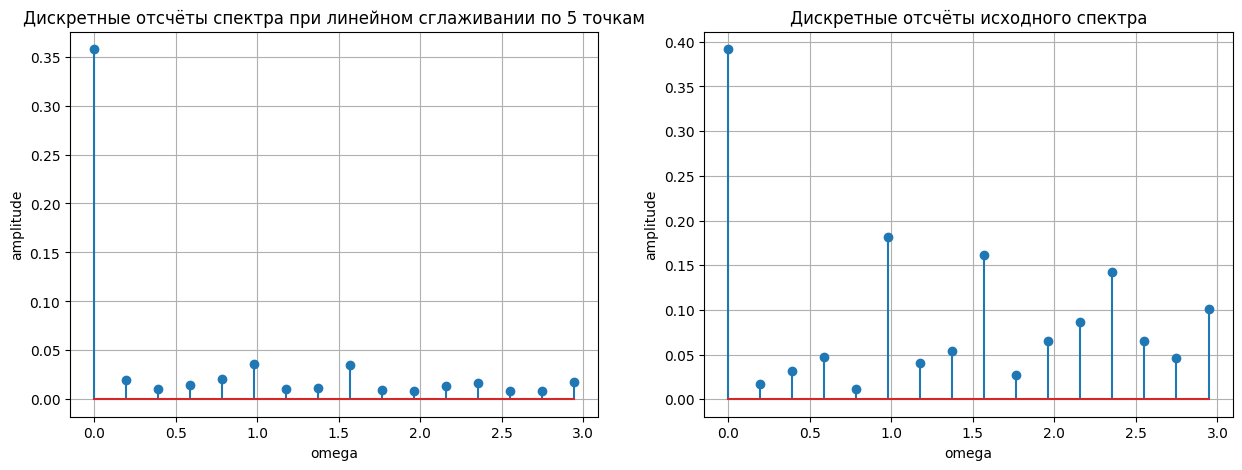

In [8]:
compare_spectrums(lin_smooth_5, signal_discrete, 'Дискретные отсчёты спектра при линейном сглаживании по 5 точкам')
plt.show()

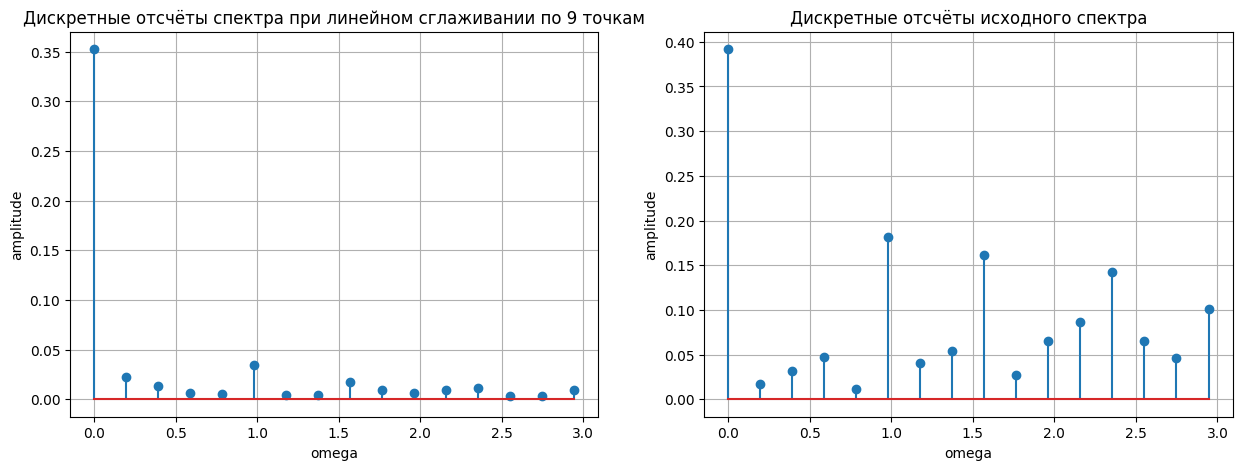

In [9]:
compare_spectrums(lin_smooth_9, signal_discrete, 'Дискретные отсчёты спектра при линейном сглаживании по 9 точкам')

7. Построим $H(\omega)$ - частотную характеристику фильтра для 5 и 9 точек:

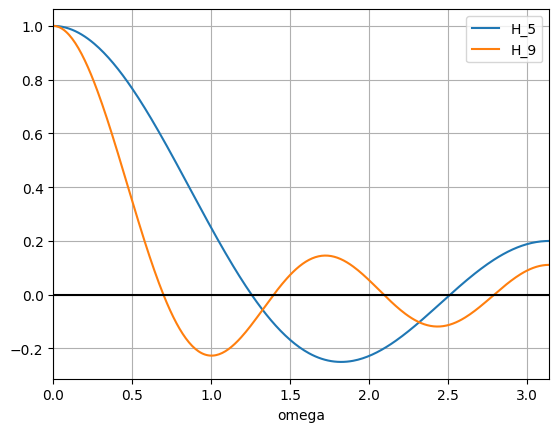

In [10]:
# Построение H(omega)
plt.plot(np.arange(0, np.pi, 0.01), [1/5 * (1 + 2 * np.cos(x) + 2 * np.cos(2*x)) for x in np.arange(0, np.pi, 0.01)], label='H_5')
plt.plot(np.arange(0, np.pi, 0.01), [1/9 * (1 + 2 * np.cos(x) + 2 * np.cos(2*x) + 2 * np.cos(3*x) + 2 * np.cos(4*x)) for x in np.arange(0, np.pi, 0.01)], label='H_9')
def plot_H():
    plt.legend()
    plt.axhline(y=0, color='k')
    plt.xlim((0, np.pi))
    plt.xlabel('omega')
    plt.grid()
    plt.show()
plot_H()

Сравнивая спектры с передаточными функциями, можно заметить, что спектры сопоставимы с модулями передаточных функций. Константный сигнал передаётся без искажения.
Амплитуда гармоник высоких частот снижена в спектре сглаженного сигнала. При этом снижение амплитуды больше при использовании сглаживания по 9 точкам

8. Поскольку функции сглаживания полиномами 2 и 4 степени уже реализованы в пункте 4, проведём остальные сравнения:

а. Построим сглаживание полиномом 2 степени по 5 и 9 точкам

In [11]:
pol_2_smooth_5 = polys(signal_discrete, 5)
pol_2_smooth_9 = polys(signal_discrete, 9)

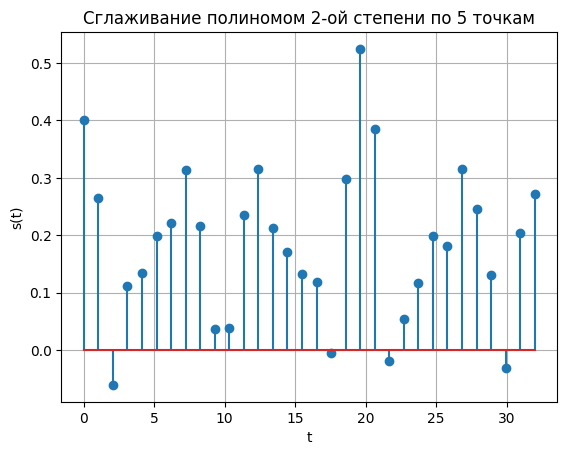

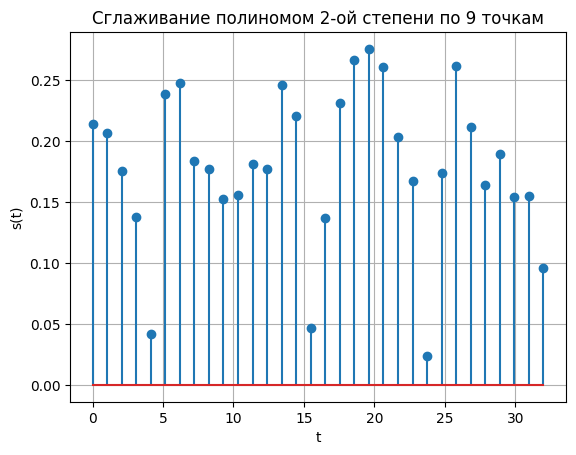

In [12]:
show_plot(x_discrete, pol_2_smooth_5)
plt.xlabel('t')
plt.ylabel('s(t)')
plt.title('Cглаживание полиномом 2-ой степени по 5 точкам')
plt.show()
show_plot(x_discrete, pol_2_smooth_9)
plt.xlabel('t')
plt.ylabel('s(t)')
plt.title('Cглаживание полиномом 2-ой степени по 9 точкам')
plt.show()

Построим спектры для сглаживаний полиномом 2 степени по 5 и 9 точкам, а также спектр исходного дискретного сигнала

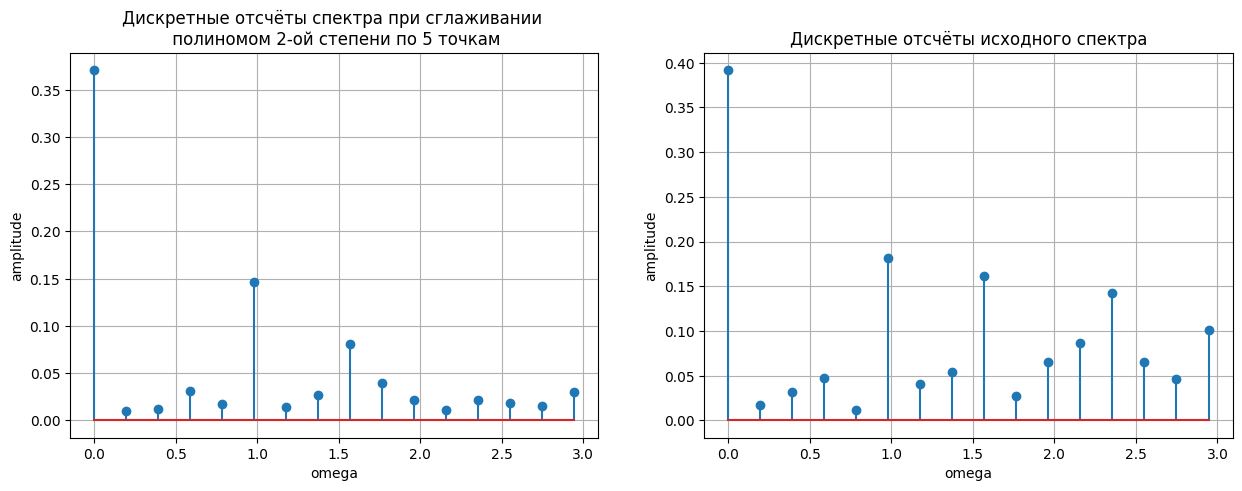

In [13]:
compare_spectrums(pol_2_smooth_5, signal_discrete, 'Дискретные отсчёты спектра при сглаживании \n полиномом 2-ой степени по 5 точкам')

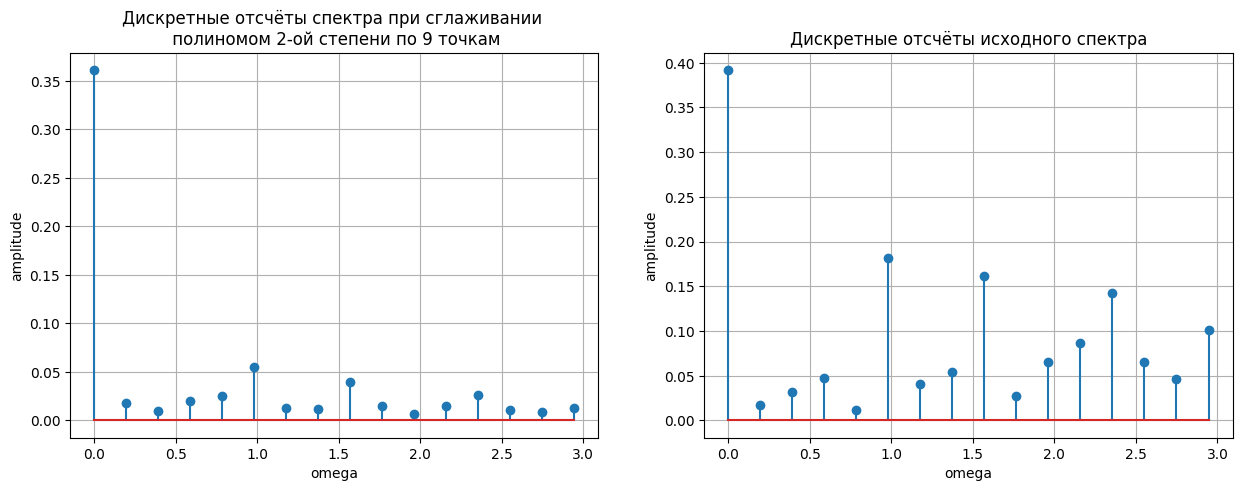

In [14]:
compare_spectrums(pol_2_smooth_9, signal_discrete, 'Дискретные отсчёты спектра при сглаживании \n полиномом 2-ой степени по 9 точкам')

Построим $H(\omega)$ для сглаживаний полиномом 2 степени

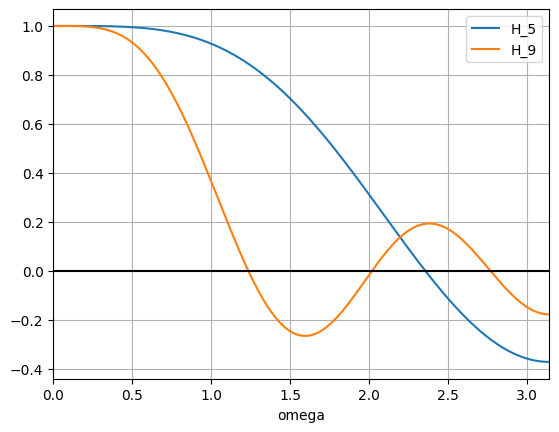

In [15]:
# Построение H(omega)
plt.plot(np.arange(0, np.pi, 0.01), [1/35 * (17 + 24 * np.cos(x) - 6 * np.cos(2 * x)) for x in np.arange(0, np.pi, 0.01)], label='H_5')
plt.plot(np.arange(0, np.pi, 0.01), [1/231 * (59 + 108 * np.cos(x) + 78 * np.cos(2 * x) + 28 * np.cos(3 * x) - 42 * np.cos(4 * x)) for x in np.arange(0, np.pi, 0.01)], label='H_9')
plot_H()

Сравнивая спектры с передаточными функциями, можно заметить, что спектры сопоставимы с модулями передаточных функций.  
Амплитуда гармоник высоких частот снижена в спектре сглаженного сигнала. При этом снижение амплитуды больше при использовании сглаживания по 9 точкам.
Окно пропускания низких частот больше, чем при использовании линейного сглаживания

b. Построим сглаживание полиномом 4 степени по 7 и 11 точкам

In [16]:
pol_4_smooth_7 = polys(signal_discrete, 7)
pol_4_smooth_11 = polys(signal_discrete, 11)

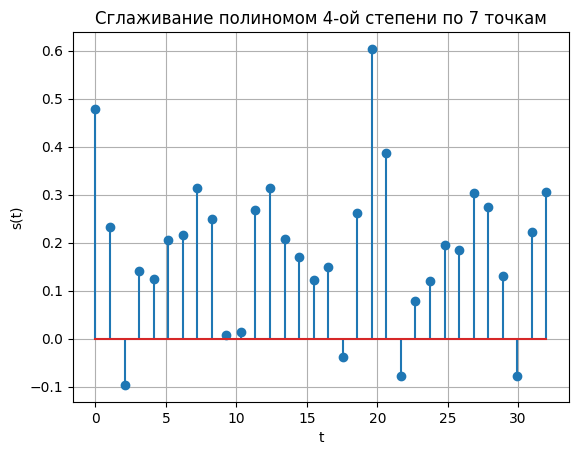

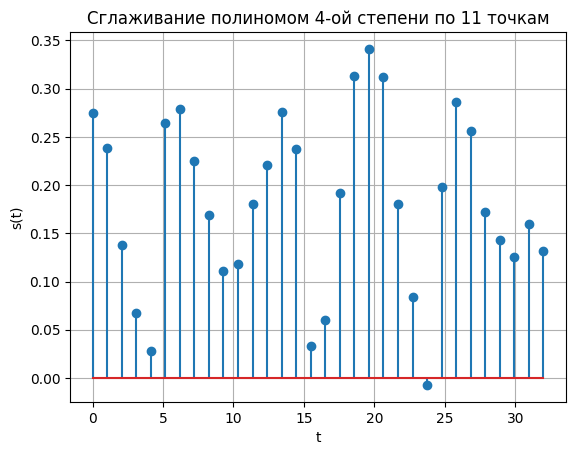

In [17]:
show_plot(x_discrete, pol_4_smooth_7)
plt.xlabel('t')
plt.ylabel('s(t)')
plt.title('Cглаживание полиномом 4-ой степени по 7 точкам')
plt.show()
show_plot(x_discrete, pol_4_smooth_11)
plt.xlabel('t')
plt.ylabel('s(t)')
plt.title('Cглаживание полиномом 4-ой степени по 11 точкам')
plt.show()

Построим спектры для сглаживаний полиномом 4 степени по 7 и 11 точкам, а также спектр исходного дискретного сигнала

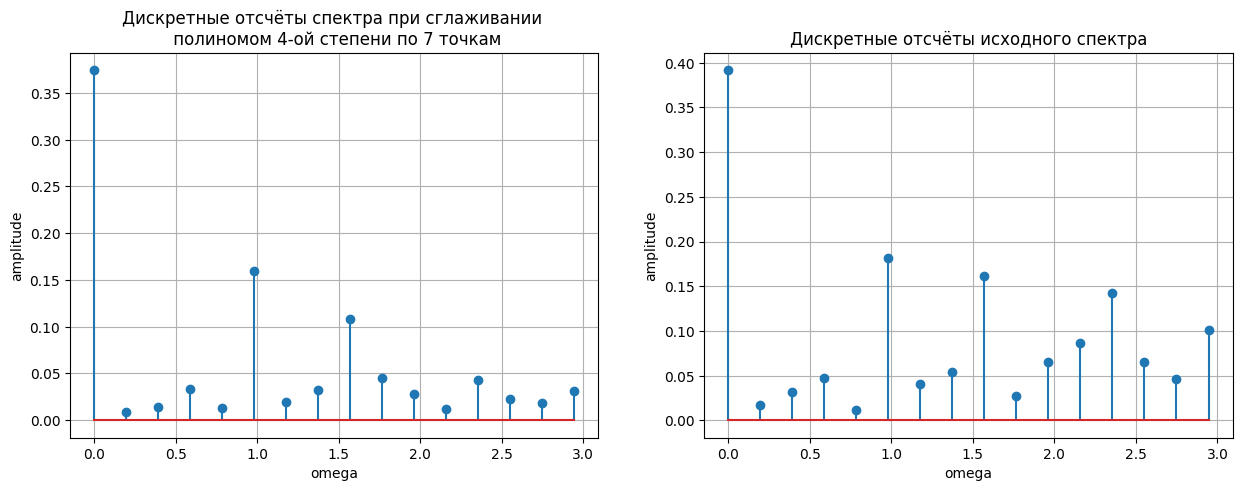

In [18]:
compare_spectrums(pol_4_smooth_7, signal_discrete, 'Дискретные отсчёты спектра при сглаживании \n полиномом 4-ой степени по 7 точкам')

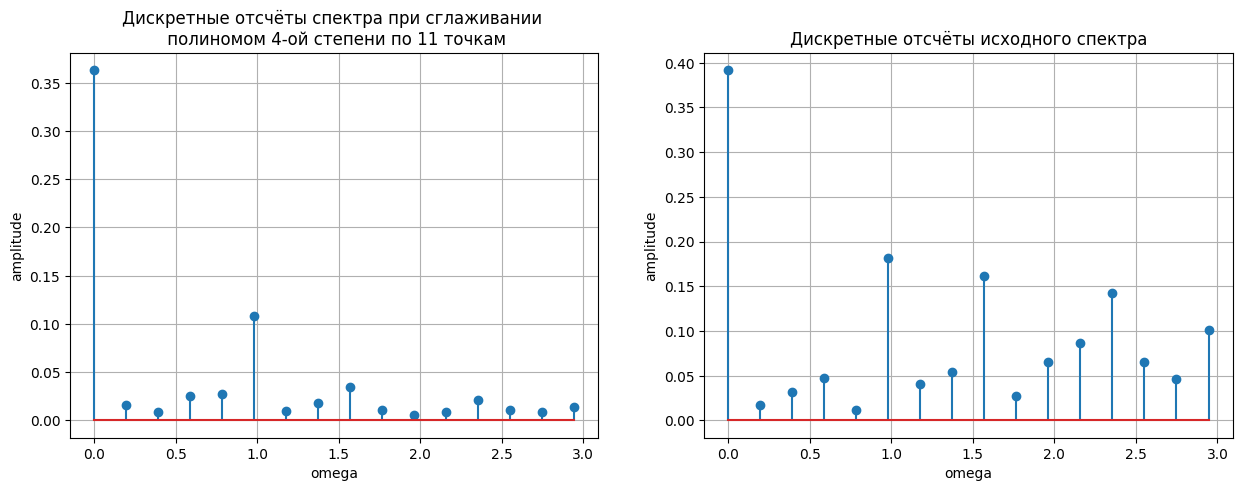

In [19]:
compare_spectrums(pol_4_smooth_11, signal_discrete, 'Дискретные отсчёты спектра при сглаживании \n полиномом 4-ой степени по 11 точкам')

Построим $H(\omega)$ для сглаживаний полиномом 4 степени

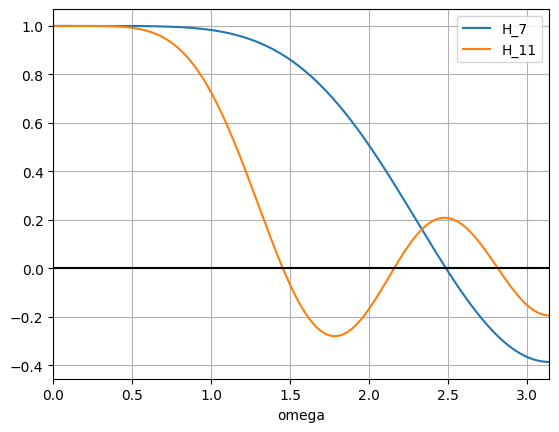

In [20]:
# # Построение H(omega)(m_element, omega)
plt.plot(np.arange(0, np.pi, 0.01), [1/231 * (131 + 150 * np.cos(x) - 60 * np.cos(2*x) + 10 * np.cos(3 * x)) for x in np.arange(0, np.pi, 0.01)], label='H_7')
plt.plot(np.arange(0, np.pi, 0.01), [1/429 * (143 + 240 * np.cos(x) + 120 * np.cos(2*x) - 20 * np.cos(3 * x) - 90 * np.cos(4 * x) + 36 * np.cos(5 * x)) for x in np.arange(0, np.pi, 0.01)], label='H_11')
plot_H()

Сравнивая спектры с передаточными функциями, можно заметить, что спектры сопоставимы с модулями передаточных функций.  
Амплитуда гармоник высоких частот снижена в спектре сглаженного сигнала. При этом снижение амплитуды больше при использовании сглаживания по 11 точкам.
Окно пропускания низких частот больше, чем при использовании сглаживания полиномом 2ой степени

### Выводы

Был проведён спектральный анализ различных сглаживаний дискретезированной функции, а также спектры были сравнены с передаточными функциями при различных $\omega$. Анализ был проведён для линейного сглаживания по 5, 9 точкам, для сглаживания полиномом 2 степени по 5, 9 точкам, для сглаживания полиномом 4 степени по 7, 11 точкам.